In [90]:
from test_nn import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

matplotlib.rcParams['figure.figsize'] = [15, 5]

In [81]:
image_folder = 'data'
annotation_csv = 'data/annotation.csv'
downsample_shape = (100,100)

unlabeled_scene_index = np.arange(106)
labeled_scene_index = np.arange(106, 134)
    
normalize = torchvision.transforms.Normalize(mean=[0.6394939, 0.6755114, 0.7049375],
                                     std=[0.31936955, 0.3117349 , 0.2953726 ])

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                           normalize
                                           ])
train_labeled_scene_index, val_labeled_scene_index = gen_train_val_index(labeled_scene_index)


class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

    
denormer = UnNormalize(mean=[0.6394939, 0.6755114, 0.7049375],std=[0.31936955, 0.3117349 , 0.2953726 ])    
    
    


def get_batch_loader(cam):
    labeled_trainset = TriangleLabeledDataset(image_folder=image_folder,
                                      annotation_file=annotation_csv,
                                      scene_index=val_labeled_scene_index,
                                      transform=transform,
                                      extra_info=True,
                                    camera = cam,downsample_shape=downsample_shape)
    val_loader = torch.utils.data.DataLoader(labeled_trainset , batch_size=2, 
                                          shuffle=True, num_workers=2, collate_fn=collate_fn)

    return val_loader

def plot_image(ax,image,title,**kw_imshow):

    ax.imshow(image,**kw_imshow);
    ax.set_title(title)
    return ax


@interactive(cam)
def show_pred_v_target(cam,num_samples=1):
    loader = get_batch_loader(cam)
    model = load_cam_model(cam,latest_fe=True,cloud=False)
    train_loader = get_batch_loader(cam)
    for i in range(num_samples):
        sample, target, road_image, extra, road_image_mod = iter(train_loader).next()
        pred = model(torch.stack(sample))[0]> 0.5
        msk = load_mask(cam,(100,100))
        orig_image = road_image[0].numpy()*msk
        pred_image = orig_image.copy()
        pred_image[msk] = pred
        fig, axs = plt.subplots(1,3)
        plot_image(axs[0],denormer(sample[0]).numpy().transpose(1, 2, 0),"Input")
        plot_image(axs[1],orig_image,"Target",cmap='binary')
        plot_image(axs[2],pred_image,"Predicted",cmap='binary')
        
    

CAM_FRONT.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt
CAM_FRONT_LEFT.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt
CAM_BACK_LEFT.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt
CAM_BACK.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt
CAM_BACK_RIGHT.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt
CAM_FRONT_RIGHT.jpeg
Loading ./models/resnet_1CAM_BACK.pt
Loading ./models/latest_fe_sd.pt


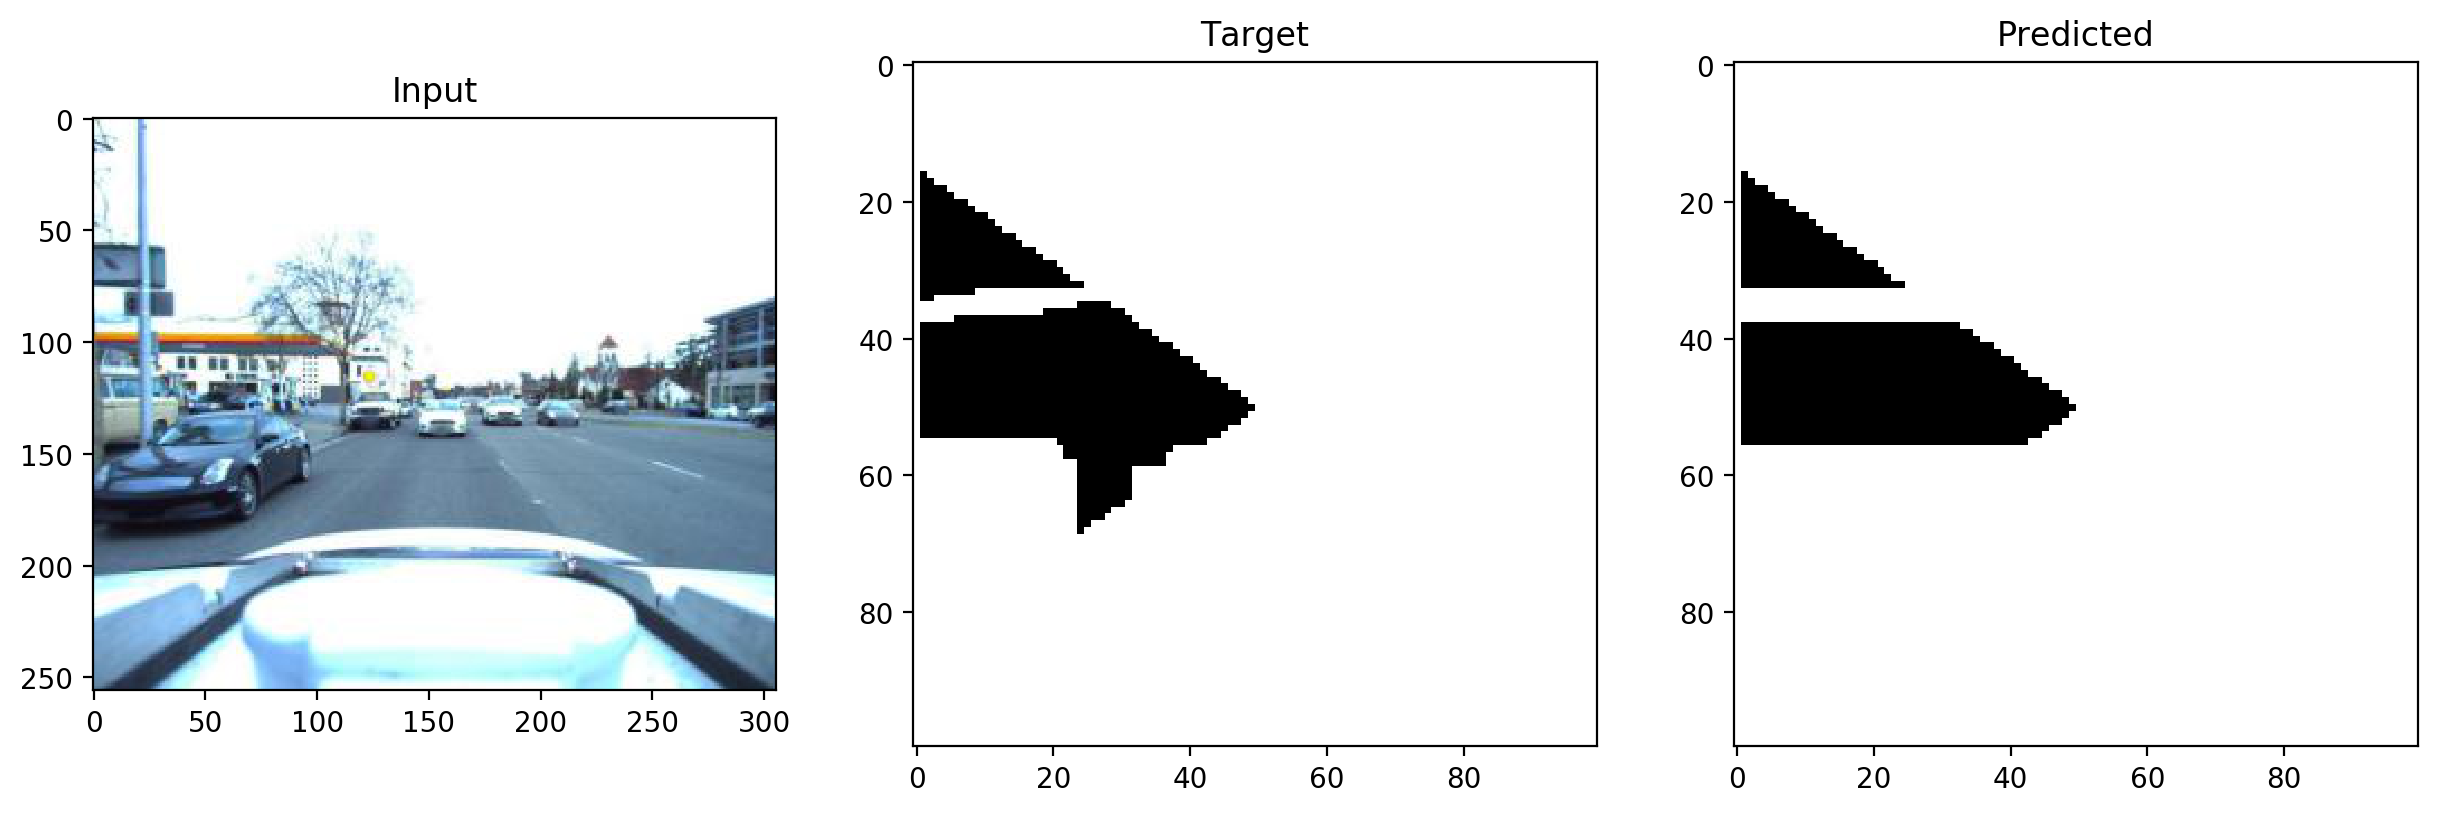

Error in callback <function flush_figures at 0x7feaf96074d0> (for post_execute):


KeyboardInterrupt: 